In [174]:
# Libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [175]:
# Load data and create copies to not modify originals

# Main Data Set from Kaggle
og_iowa=pd.read_csv('train.csv', sep=',')
df_iowa = og_iowa.copy()

# Validation Data Set #1
og_ca=pd.read_csv('RealEstate.csv', sep =',')
df_ca = og_ca.copy()

# Validation Data Set #2
og_nc=pd.read_excel('woodard.xls')
df_nc = og_nc.copy()

In [176]:
# Create Merged Data Set
# The merged data set is composed of all features that are common to at least one of the three individual data sets.

# Prep 1st Dataset (Iowa)
# Select columns needed from Iowa DS 
df_iowa = df_iowa[['SalePrice', 'YearBuilt', 'HouseStyle', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', \
                   'BedroomAbvGr','TotalBsmtSF', 'GrLivArea', 'SaleType', 'LotArea', 'Fireplaces']]
# half bath is 0.5
df_iowa['hbath'] = df_iowa['BsmtHalfBath'] + df_iowa['HalfBath']  
df_iowa['hbath'] = np.where(df_iowa['hbath'] > 0, df_iowa['hbath']/2 , 0)
df_iowa['bath'] = df_iowa['BsmtFullBath'] + df_iowa['FullBath'] + df_iowa['hbath']
# sum up basement and other living area to get total sq. feet
df_iowa['Sq. Ft.'] = df_iowa['TotalBsmtSF'] + df_iowa['GrLivArea']
#Remove unwanted columns now that we have a new column for bath in DF and we have sq. feet
df_iowa.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'hbath', 'TotalBsmtSF', 'GrLivArea'], axis =1, inplace = True)
# Renaming the columns on Iowa df to keep them uniform across all data sets
df_iowa.columns = ['SalePrice', 'YearBuilt', 'Stories', 'Bed', 'SaleType', 'Sq. Ft.', 'Fireplaces', 'Bath', 'LotArea']

# Prep 2nd Dataset (California)
df_ca=pd.read_csv('RealEstate.csv', sep=',')
df_ca = df_ca[['Price', 'Bedrooms', 'Bathrooms', 'Size', 'Status']]
df_ca.columns = ['SalePrice', 'Bed', 'Bath', 'Sq. Ft.', 'SaleType']

# Prep 3rd Dataset (North Carolina)
new_file = pd.ExcelFile("woodard.xls")
df_nc = new_file.parse("Sheet1")
df_nc = df_nc[['Total $', 'Year Built', 'Sq. Ft.', 'Story', 'No. Baths', 'Acres', 'Fireplaces']]
df_nc.columns = ['SalePrice', 'YearBuilt', 'Sq. Ft.', 'Stories', 'Bath', 'LotArea', 'Fireplaces']
df_nc['LotArea'] = df_nc['LotArea'] * 43560

# Concatenation
df_final = pd.concat([df_iowa,df_ca,df_nc], axis=0, ignore_index=True)
df_final.replace('', np.NaN)
df_final['YearBuilt'] = df_final['YearBuilt'].fillna(0).astype(np.int64)

In [177]:
#df_final.Stories = df_final.Stories.str.findall('(\d+)')[0]

(0, 6000)

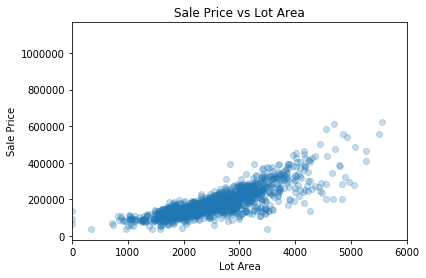

In [181]:
#plt.scatter(df_final['LotArea'], np.log(df_final['SalePrice']), alpha = 0.25 )
plt.scatter(df_final['LotArea'][df_final['LotArea'] < 250000], df_final['SalePrice'][df_final['LotArea'] < 250000], alpha = 0.25 )
plt.ylabel('Sale Price')
plt.xlabel('Lot Area')
plt.title('Sale Price vs Lot Area')
# Relationship is more interesting for Lots under 6000 ft^2
plt.xlim(0, 6000)

In [179]:
df_final

,Bath,Bed,Fireplaces,LotArea,SalePrice,SaleType,Sq. Ft.,Stories,YearBuilt
0,3.5,3.0,0.0,2566.0,208500.0,WD,8450,2Story,2003
1,2.5,3.0,1.0,2524.0,181500.0,WD,9600,1Story,1976
2,3.5,3.0,1.0,2706.0,223500.0,WD,11250,2Story,2001
3,2.0,3.0,1.0,2473.0,140000.0,WD,9550,2Story,1915
4,3.5,4.0,1.0,3343.0,250000.0,WD,14260,2Story,2000
5,2.5,1.0,0.0,2158.0,143000.0,WD,14115,1.5Fin,1993
6,3.0,3.0,1.0,3380.0,307000.0,WD,10084,1Story,2004
7,3.5,3.0,2.0,3197.0,200000.0,WD,10382,2Story,1973
8,2.0,2.0,2.0,2726.0,129900.0,WD,6120,1.5Fin,1931
9,2.0,2.0,2.0,2068.0,118000.0,WD,7420,1.5Unf,1939
